In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

<AxesSubplot:>

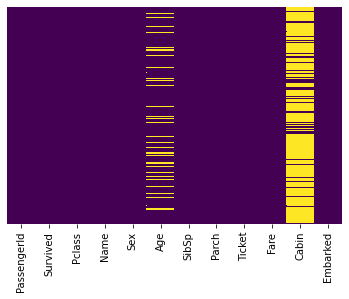

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")
# at the age there notv much missing data, but in the cabin there is alot of missing data 

<AxesSubplot:xlabel='Survived', ylabel='count'>

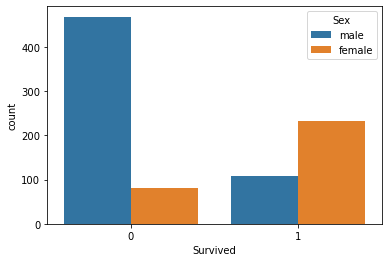

In [6]:
sns.countplot(x="Survived", data=train, hue="Sex")
# 1 mean true and 0 mean false

<AxesSubplot:xlabel='Survived', ylabel='count'>

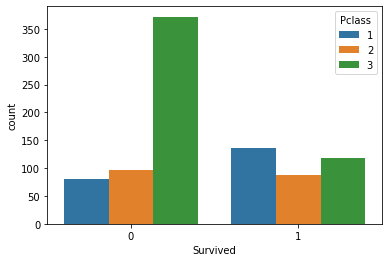

In [7]:
sns.countplot(x="Survived", data=train, hue="Pclass")

<AxesSubplot:xlabel='Age'>

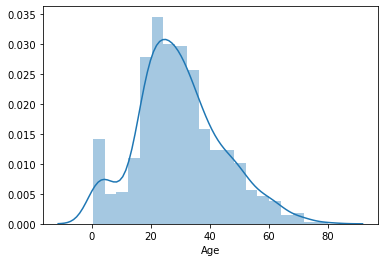

In [8]:
sns.distplot(train["Age"].dropna() )

<AxesSubplot:ylabel='Frequency'>

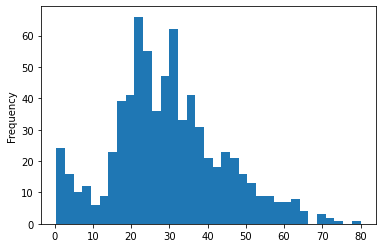

In [9]:
train["Age"].plot.hist(bins=35)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

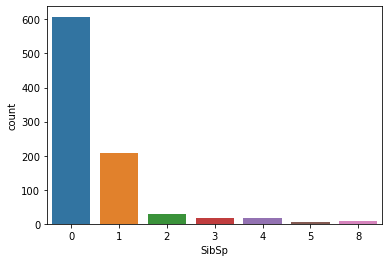

In [11]:
sns.countplot(x="SibSp", data=train)

<AxesSubplot:>

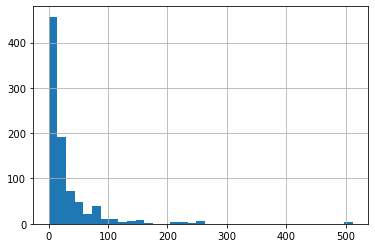

In [12]:
train["Fare"].hist(bins=35, )

In [13]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [15]:
train["Fare"].iplot(kind="hist")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

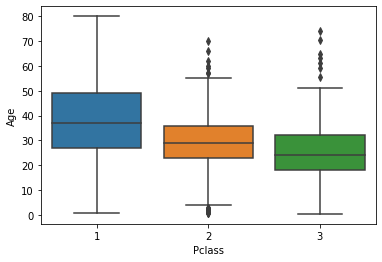

In [16]:
sns.boxplot(x="Pclass", y="Age", data=train)

In [17]:
# now we gonna fill the empty data
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
train["Age"] = train[["Age", "Pclass"]].apply(input_age, axis=1)

<AxesSubplot:>

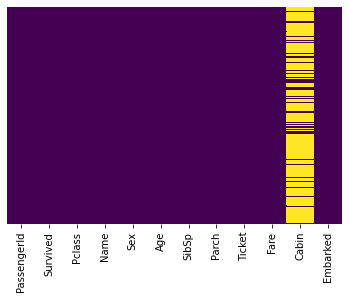

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [20]:
train.dropna(inplace=True)

In [21]:
sex = pd.get_dummies(train["Sex"], drop_first=True) # get_dummies: Convert categorical variable into dummy/indicator variables

In [22]:
embarked = pd.get_dummies(train["Embarked"], drop_first=True)

In [23]:
train = pd.concat([train, sex, embarked], axis=1)

In [24]:
train.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  male  Q  S  
1       0  PC 17599  71.2833   C85        C     0  0  0  
3       0    113803  53.1000  C123        S     0  0  1  
6       0     17463  51.8625   E46        S     1  0  1  
10      1   PP 9549  16.7000    G6        S     0  0  1  
11      0    113783  26.5500  C103        S     0  0  1

In [25]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [26]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare Cabin  male  Q  \
1             2         1       1  38.0      1      0  71.2833   C85     0  0   
3             4         1       1  35.0      1      0  53.1000  C123     0  0   
6             7         0       1  54.0      0      0  51.8625   E46     1  0   
10           11         1       3   4.0      1      1  16.7000    G6     0  0   
11           12         1       1  58.0      0      0  26.5500  C103     0  0   

    S  
1   0  
3   1  
6   1  
10  1  
11  1

In [27]:
train.drop("PassengerId", axis=1, inplace=True)

In [28]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare Cabin  male  Q  S
1          1       1  38.0      1      0  71.2833   C85     0  0  0
3          1       1  35.0      1      0  53.1000  C123     0  0  1
6          0       1  54.0      0      0  51.8625   E46     1  0  1
10         1       3   4.0      1      1  16.7000    G6     0  0  1
11         1       1  58.0      0      0  26.5500  C103     0  0  1

In [43]:
# Now we gonna predict 
x = train.drop(["Survived", "Cabin"], axis=1)
y = train["Survived"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 101) #test_size is mean take 40% of data for 

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [52]:
predictions = logmodel.predict(x_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.86      0.90      0.88        41

    accuracy                           0.84        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.83      0.84      0.83        61



In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test, predictions)

array([[14,  6],
       [ 4, 37]], dtype=int64)